## Bitcoin Analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, model_selection, preprocessing, tree
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

In [34]:

%%time

df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv")
df.head()

CPU times: user 622 ms, sys: 149 ms, total: 771 ms
Wall time: 765 ms


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add New Column: Date

In [35]:
df['date'] = pd.to_datetime(df.Timestamp, unit = 's')

In [36]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'date'],
      dtype='object')

In [37]:
%%time
df = (df.set_index('date')
     .rename(columns= {'Timestamp':'Timestamp',
                       'Open':'Open',
                       'High':'High',
                       'Low': 'Low',
                       'Close' : 'Close',
                       'Volume_(BTC)': 'Volume_BTC',
                       'Volume_(Currency)': 'Volume_Currency',
                       'Weighted_Price': 'Weighted_Price'
         
     })
     .resample('d')
     .agg({'Timestamp': 'min',
           'Open': 'first',
          'High': 'mean',
          'Low': 'mean',
          'Close': 'last',
          'Volume_BTC': 'sum',
           'Volume_Currency': 'sum',
           'Weighted_Price': 'mean'
          })
     .iloc[-1000:] # give me last 1000 rows
     .assign(buy = lambda x: (x.Close.shift(-1) > x.Close).astype(int))
      .iloc[:-1]
     )

CPU times: user 253 ms, sys: 123 ms, total: 376 ms
Wall time: 204 ms


In [38]:
print(dir(df))

['Close', 'High', 'Low', 'Open', 'T', 'Timestamp', 'Volume_BTC', 'Volume_Currency', 'Weighted_Price', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__

In [39]:
df

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,buy
date,,,,,,,,,
2011-12-31,1325317920,4.39,4.482500,4.465000,4.58,95.317878,4.253203e+02,4.471603,1
2012-01-01,1325376000,4.58,4.806667,4.806667,5.00,21.602000,1.057792e+02,4.806667,0
2012-01-02,1325462400,5.00,5.000000,5.000000,5.00,19.048000,9.524000e+01,5.000000,1
2012-01-03,1325548800,5.32,5.252500,5.252500,5.29,88.037281,4.648052e+02,5.252500,1
2012-01-04,1325635200,4.93,5.223333,5.200000,5.57,107.233260,5.680762e+02,5.208159,1
...,...,...,...,...,...,...,...,...,...
2013-12-23,1387756800,612.66,636.244928,634.740882,654.76,13100.164166,8.341248e+06,635.469671,0
2013-12-24,1387843200,654.76,651.400024,649.743628,652.99,12795.804031,8.297361e+06,650.480175,1
2013-12-25,1387929600,653.57,659.193395,658.190709,679.01,6653.009651,4.396959e+06,658.734745,1


In [51]:
df.isnull().sum()

Timestamp          0
Open               0
High               0
Low                0
Close              0
Volume_BTC         0
Volume_Currency    0
Weighted_Price     0
buy                0
dtype: int64

In [40]:
df.dtypes

Timestamp            int64
Open               float64
High               float64
Low                float64
Close              float64
Volume_BTC         float64
Volume_Currency    float64
Weighted_Price     float64
buy                  int64
dtype: object

In [41]:
pd.to_datetime(df.Timestamp, unit ='s')

date
2011-12-31   2011-12-31 07:52:00
2012-01-01   2012-01-01 00:00:00
2012-01-02   2012-01-02 00:00:00
2012-01-03   2012-01-03 00:00:00
2012-01-04   2012-01-04 00:00:00
                     ...        
2013-12-23   2013-12-23 00:00:00
2013-12-24   2013-12-24 00:00:00
2013-12-25   2013-12-25 00:00:00
2013-12-26   2013-12-26 00:00:00
2013-12-27   2013-12-27 00:00:00
Freq: D, Name: Timestamp, Length: 728, dtype: datetime64[ns]

# Random Forest Analysis

In [42]:
ignore = {'buy'}
cols = [c for c in df.columns if c not in ignore]

# Creates many decision tree but randomly chooses which columns will to added randomly

In [43]:
cols

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_BTC',
 'Volume_Currency',
 'Weighted_Price']

# Cross Validation 

In [44]:
X= df[cols]
y= df.buy

In [45]:
X_train, X_test, y_train, y_test = model_selection.\
train_test_split(X,y, test_size = .3, random_state= 42)

# Initalize Random Forest Classifier, Fit and Training Score

In [46]:
%%time
RandomForest = ensemble.RandomForestClassifier(random_state = 42, )
RandomForest.fit(X_train, y_train)
RandomForest.score(X_train, y_train)



CPU times: user 26.4 ms, sys: 7.79 ms, total: 34.2 ms
Wall time: 42 ms


/Users/Samrawit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9587426326129665

### * Score : 0.9587426326129665

In [47]:
# Random Forest Prediction Score 

In [48]:
%%time
RandomForest.score(X_test, y_test)

CPU times: user 4.67 ms, sys: 1.63 ms, total: 6.3 ms
Wall time: 4.83 ms


0.6073059360730594

### * Score : 0.6073059360730594

# ROC Curve

* What we want our test data took look like.  (This is the training data)

/Users/Samrawit/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


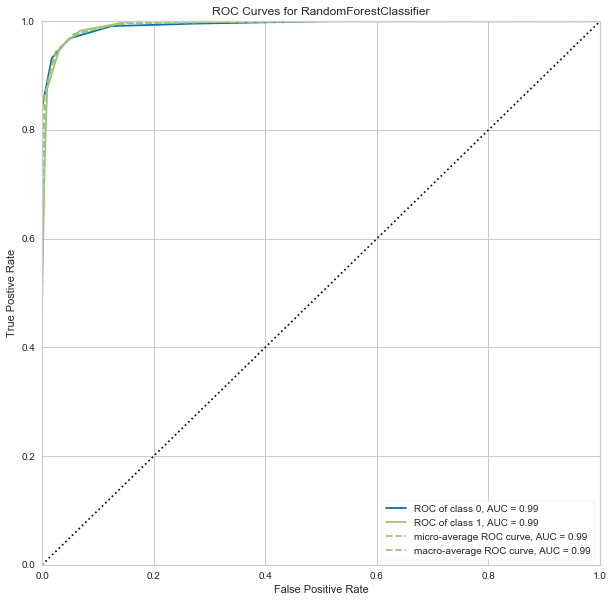

In [52]:
# yellowbrick version
fig, ax = plt.subplots(figsize=(10, 10))
roc_viz = ROCAUC(RandomForest)
# roc_viz.score(X_test, y_test)
roc_viz.score(X_train, y_train)

roc_viz.poof()

* What our data look like (This is the testing data)

/Users/Samrawit/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


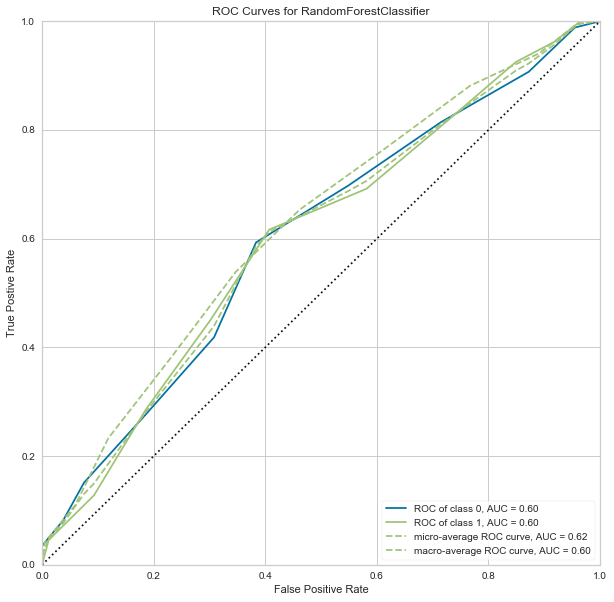

In [50]:
# yellowbrick version
fig, ax = plt.subplots(figsize=(10, 10))
roc_viz = ROCAUC(RandomForest)
roc_viz.score(X_test, y_test)
#roc_viz.score(X_train, y_train)

roc_viz.poof()